<a href="https://colab.research.google.com/github/dudududukim/Deeplearning_learning/blob/MNIST/MNIST_dataset(with_xavier_init).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.4.0

In [3]:
#epoch와 batch를 이용
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import torch
 
tf.set_random_seed(777)  # for reproducibility
 
'''
from tensorflow.examples.tutorials.mnist import input_data
 
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
nb_classes = 10
'''
#file input from google drive
xy=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/train.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,1:]
y_data = xy[:,0]
 
xy_test=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/mnist_test.csv',delimiter=',',dtype=np.float32)
test_x = xy_test[:,1:]
test_y = xy_test[:,0]
 
print(y_data)
print(len(y_data))
print(y_data.reshape(len(y_data),1))
 
'''
filename_queue = tf.train.string_input_producer(
    ['/content/drive/MyDrive/tensorflow/mnist/train.csv'], shuffle=False, name='filename_queue')
 
reader=tf.TextLineReader()
key, value = reader.read(filename_queue)
 
record_defaults=[[0.]]*785
xy=tf.decode_csv(value, record_defaults=record_defaults)
 
train_x, train_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=1000))
test_x, test_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=100))
'''
 
print('Data loaded!!')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

[1. 0. 1. ... 7. 6. 9.]
42000
[[1.]
 [0.]
 [1.]
 ...
 [7.]
 [6.]
 [9.]]
Data loaded!!


Epoch: 0001, Cost: 10.598051503
Epoch: 0002, Cost: 3.954285629
Epoch: 0003, Cost: 2.968509263
Epoch: 0004, Cost: 2.421414083
Epoch: 0005, Cost: 2.057833568
Epoch: 0006, Cost: 1.798872619
Epoch: 0007, Cost: 1.602178346
Epoch: 0008, Cost: 1.446301368
Epoch: 0009, Cost: 1.317552568
Epoch: 0010, Cost: 1.209372939
Epoch: 0011, Cost: 1.117290936
Epoch: 0012, Cost: 1.037011879
Epoch: 0013, Cost: 0.966264960
Epoch: 0014, Cost: 0.903981235
Epoch: 0015, Cost: 0.848581902
Epoch: 0016, Cost: 0.798722811
Epoch: 0017, Cost: 0.753614904
Epoch: 0018, Cost: 0.712731908
Epoch: 0019, Cost: 0.675318935
Epoch: 0020, Cost: 0.640889866
Epoch: 0021, Cost: 0.609111582
Epoch: 0022, Cost: 0.579709222
Epoch: 0023, Cost: 0.552171227
Epoch: 0024, Cost: 0.526618616
Epoch: 0025, Cost: 0.502663219
Epoch: 0026, Cost: 0.480296011
Epoch: 0027, Cost: 0.459153964
Epoch: 0028, Cost: 0.439117629
Epoch: 0029, Cost: 0.420207304
Epoch: 0030, Cost: 0.402367558
Learning finished
Accuracy:  0.9607143
20977 Prediction:  [6]


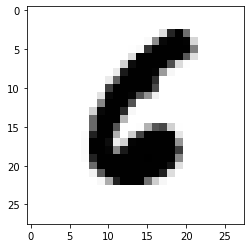

16884 Prediction:  [4]


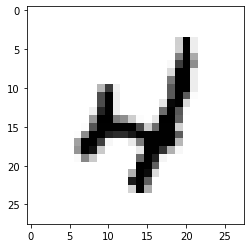

18905 Prediction:  [2]


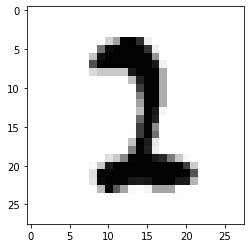

5526 Prediction:  [5]


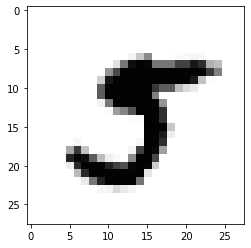

20385 Prediction:  [2]


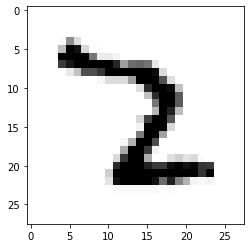

4222 Prediction:  [2]


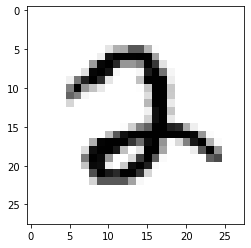

14666 Prediction:  [7]


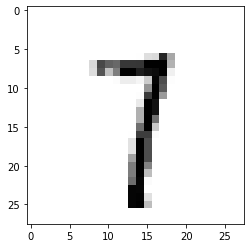

6404 Prediction:  [8]


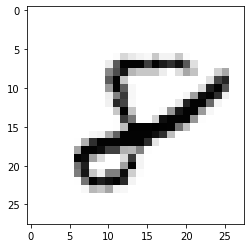

8080 Prediction:  [1]


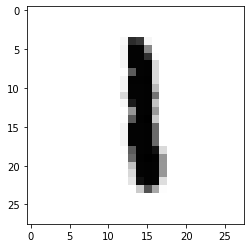

1212 Prediction:  [8]


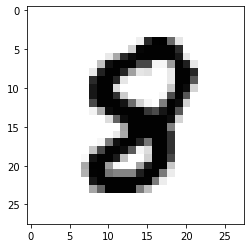

In [ ]:
#input layer와 output layer의 개수를 이용한 initialization

nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
layer1=tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)

w3 = tf.get_variable("W3", shape=[256, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer2,w3)+b3
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 30
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / (num_iterations+1)

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()

Epoch: 0001, Cost: 7.085374933
Epoch: 0002, Cost: 2.662612606
Epoch: 0003, Cost: 1.941799931
Epoch: 0004, Cost: 1.563088724
Epoch: 0005, Cost: 1.317364916
Epoch: 0006, Cost: 1.138919279
Epoch: 0007, Cost: 1.001833216
Epoch: 0008, Cost: 0.892272204
Epoch: 0009, Cost: 0.801484341
Epoch: 0010, Cost: 0.725810398
Epoch: 0011, Cost: 0.661326510
Epoch: 0012, Cost: 0.605230970
Epoch: 0013, Cost: 0.555585136
Epoch: 0014, Cost: 0.511359323
Epoch: 0015, Cost: 0.472191968
Learning finished
Accuracy:  0.94633335
26642 Prediction:  [9]


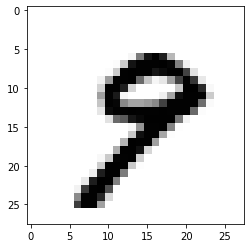

842 Prediction:  [0]


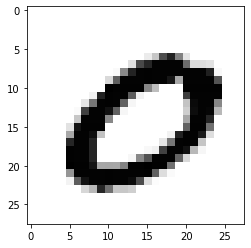

22557 Prediction:  [5]


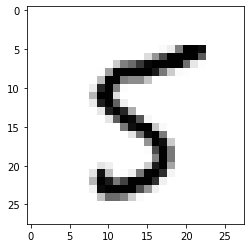

7149 Prediction:  [5]


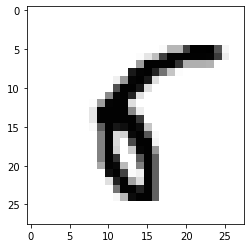

7254 Prediction:  [1]


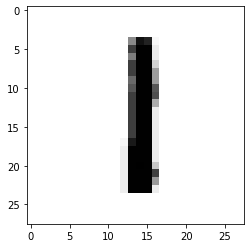

5334 Prediction:  [1]


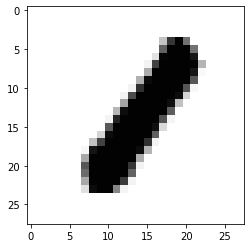

8230 Prediction:  [8]


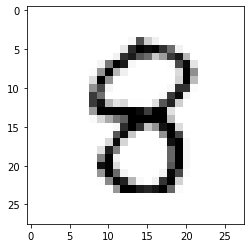

17073 Prediction:  [1]


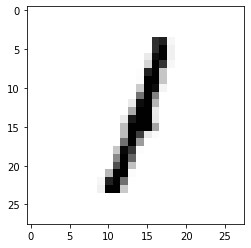

26812 Prediction:  [1]


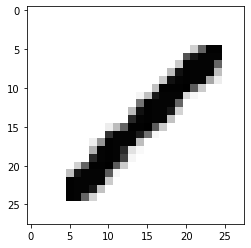

3104 Prediction:  [5]


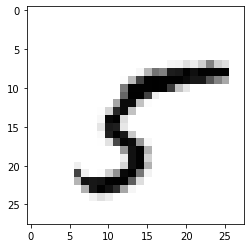

In [ ]:
#input layer와 output layer의 개수를 이용한 initialization

nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.get_variable("w1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
layer1=tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.get_variable("w2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)

w3 = tf.get_variable("w3", shape=[512, 256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]))
layer3=tf.nn.relu(tf.matmul(layer2, w3)+b3)

w4 = tf.get_variable("w4", shape=[256, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer3,w4)+b4
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 15
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()

정확도가 높더라도, overfitting이 일어나 
테스팅 데이터에 대해서
정확도가 낮게 나올 수 있음

Epoch: 0001, Cost: 34.224610937
Epoch: 0002, Cost: 12.259848349
Epoch: 0003, Cost: 8.241076742
Epoch: 0004, Cost: 6.250148095
Epoch: 0005, Cost: 5.016782318
Epoch: 0006, Cost: 4.383933033
Epoch: 0007, Cost: 3.732613071
Epoch: 0008, Cost: 3.341257176
Epoch: 0009, Cost: 3.015890049
Epoch: 0010, Cost: 2.777236748
Epoch: 0011, Cost: 2.551671085
Epoch: 0012, Cost: 2.373442434
Epoch: 0013, Cost: 2.231251403
Epoch: 0014, Cost: 2.096182188
Epoch: 0015, Cost: 2.008935584
Epoch: 0016, Cost: 1.916671035
Epoch: 0017, Cost: 1.850795805
Epoch: 0018, Cost: 1.775224380
Epoch: 0019, Cost: 1.724126644
Epoch: 0020, Cost: 1.677885845
Epoch: 0021, Cost: 1.602647308
Epoch: 0022, Cost: 1.569521253
Epoch: 0023, Cost: 1.534870049
Epoch: 0024, Cost: 1.484215389
Epoch: 0025, Cost: 1.439350316
Epoch: 0026, Cost: 1.408751098
Epoch: 0027, Cost: 1.390948712
Epoch: 0028, Cost: 1.356844683
Epoch: 0029, Cost: 1.327559108
Epoch: 0030, Cost: 1.309541909
Learning finished
Accuracy:  0.8582
3042 Prediction:  [4]


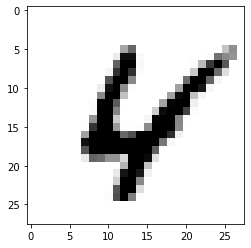

2615 Prediction:  [4]


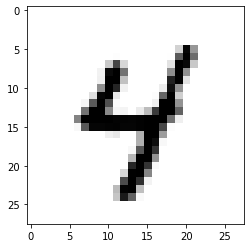

9055 Prediction:  [8]


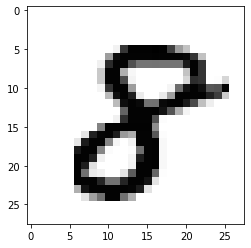

3921 Prediction:  [2]


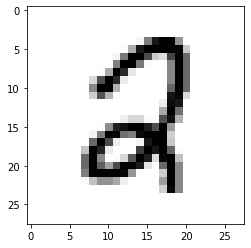

5117 Prediction:  [6]


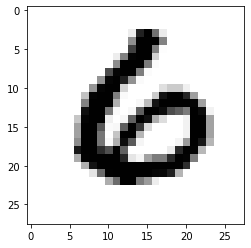

2144 Prediction:  [6]


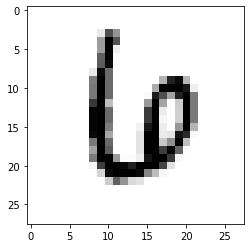

1110 Prediction:  [7]


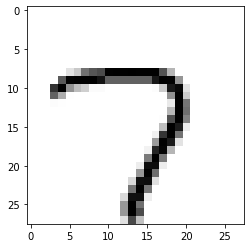

91 Prediction:  [6]


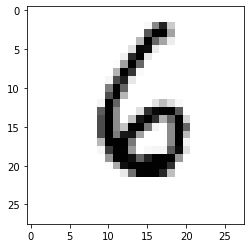

9302 Prediction:  [7]


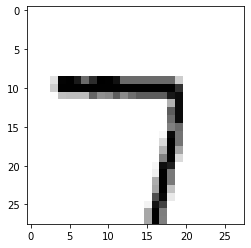

1510 Prediction:  [8]


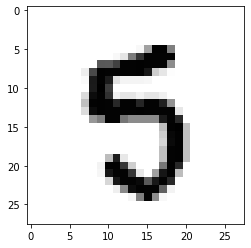

In [6]:
#input layer와 output layer의 개수를 이용한 initialization
#drop-out

nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])

keep_prob=tf.placeholder(tf.float32)

y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.get_variable("w1.", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
layer1=tf.nn.relu(tf.matmul(x, w1)+b1)
layer1=tf.nn.dropout(layer1,keep_prob=keep_prob)

w2 = tf.get_variable("w2.", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)
layer2=tf.nn.dropout(layer2,keep_prob=keep_prob)

w3 = tf.get_variable("w3.", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]))
layer3=tf.nn.relu(tf.matmul(layer2, w3)+b3)
layer3=tf.nn.dropout(layer3,keep_prob=keep_prob)

w4 = tf.get_variable("w4.", shape=[256, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer3,w4)+b4
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 30
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1),keep_prob:0.7})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: test_x, y: test_y.reshape(len(test_y),1), keep_prob:1}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1], keep_prob:1}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    
    plt.show()

Epoch: 0001, Cost: 28.056939675
Epoch: 0002, Cost: 10.825850500
Epoch: 0003, Cost: 7.589821048
Epoch: 0004, Cost: 6.138351763
Epoch: 0005, Cost: 5.080893679
Epoch: 0006, Cost: 4.497587889
Epoch: 0007, Cost: 4.038128990
Epoch: 0008, Cost: 3.653813473
Epoch: 0009, Cost: 3.323878463
Epoch: 0010, Cost: 3.040354025
Epoch: 0011, Cost: 2.878904098
Epoch: 0012, Cost: 2.655342283
Epoch: 0013, Cost: 2.511024728
Epoch: 0014, Cost: 2.310763339
Epoch: 0015, Cost: 2.238867797
Epoch: 0016, Cost: 2.158921841
Epoch: 0017, Cost: 2.048098045
Epoch: 0018, Cost: 1.969099981
Epoch: 0019, Cost: 1.834805048
Epoch: 0020, Cost: 1.790673816
Epoch: 0021, Cost: 1.748257355
Epoch: 0022, Cost: 1.636080071
Epoch: 0023, Cost: 1.661648421
Epoch: 0024, Cost: 1.536338814
Epoch: 0025, Cost: 1.515719255
Epoch: 0026, Cost: 1.485399719
Epoch: 0027, Cost: 1.414675304
Epoch: 0028, Cost: 1.393207535
Epoch: 0029, Cost: 1.351519404
Epoch: 0030, Cost: 1.328749616
Learning finished
Accuracy:  0.9199
4259 Prediction:  [9]


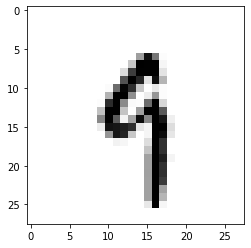

4188 Prediction:  [0]


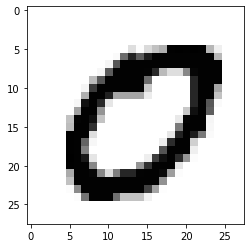

3536 Prediction:  [0]


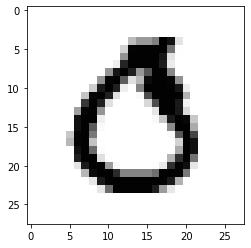

828 Prediction:  [2]


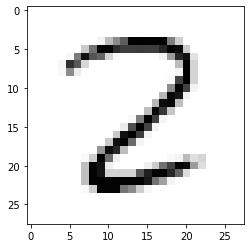

4041 Prediction:  [3]


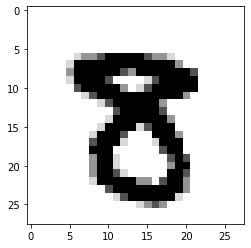

8103 Prediction:  [6]


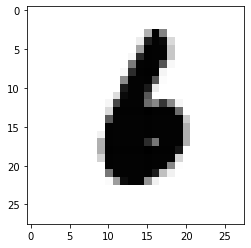

9344 Prediction:  [4]


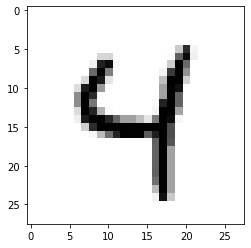

3838 Prediction:  [1]


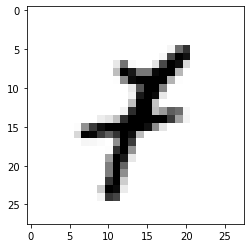

8643 Prediction:  [5]


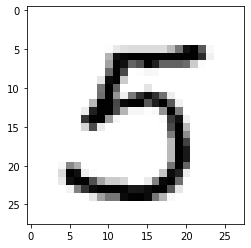

9152 Prediction:  [4]


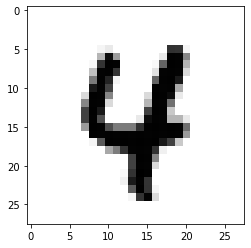

In [7]:
#input layer와 output layer의 개수를 이용한 initialization
#drop-out

nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])

keep_prob=tf.placeholder(tf.float32)

y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.get_variable("w1..", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
layer1=tf.nn.relu(tf.matmul(x, w1)+b1)
layer1=tf.nn.dropout(layer1,keep_prob=keep_prob)

w2 = tf.get_variable("w2..", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)
layer2=tf.nn.dropout(layer2,keep_prob=keep_prob)

w3 = tf.get_variable("w3..", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
layer3=tf.nn.relu(tf.matmul(layer2, w3)+b3)
layer3=tf.nn.dropout(layer3,keep_prob=keep_prob)

w4 = tf.get_variable("w4..", shape=[512, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer3,w4)+b4
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 30
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1),keep_prob:0.7})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: test_x, y: test_y.reshape(len(test_y),1), keep_prob:1}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1], keep_prob:1}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    
    plt.show()